In [5]:
!pip install openpyxl



   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ Đã lưu dữ liệu tổng nhu cầu theo tuần vào file: weekly_demand_total.xlsx


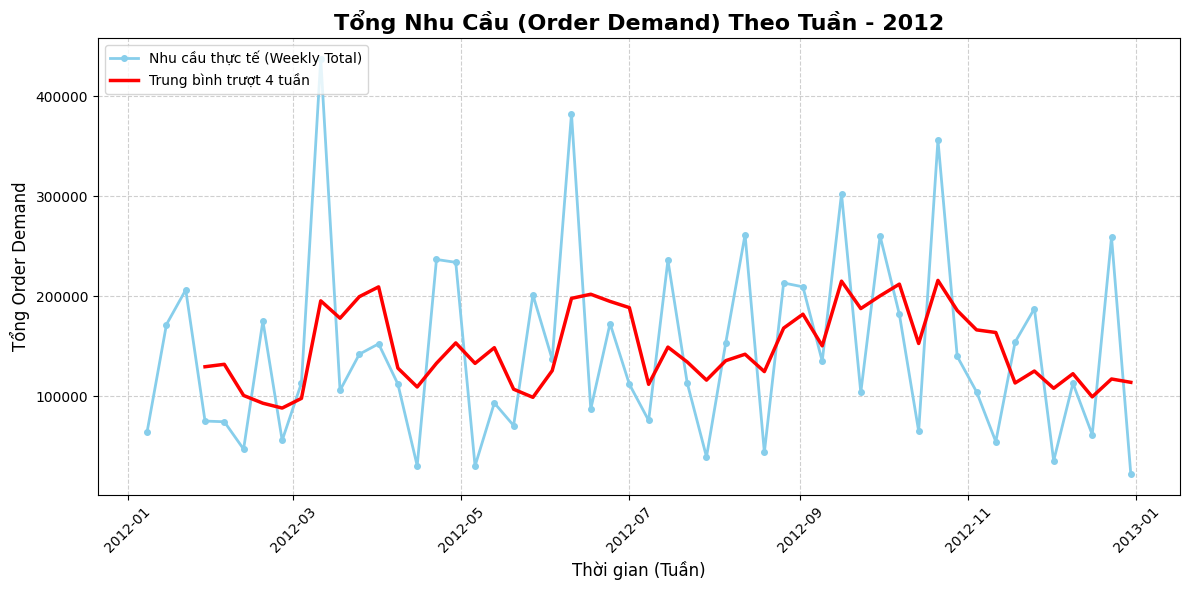

In [6]:
# ============================
# GOM DỮ LIỆU THEO TUẦN + BIỂU ĐỒ MƯỢT
# ============================

import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Đọc file Excel gốc
df = pd.read_excel(r"C:\Users\Dell\Downloads\datasetprj_2012_cleaned (1).xlsx")

# 2️⃣ Chuyển cột 'Date' sang kiểu datetime
df['Date'] = pd.to_datetime(df['Date'])

# 3️⃣ Đặt 'Date' làm index
df = df.set_index('Date')

# 4️⃣ Gom dữ liệu theo tuần (tổng Order_Demand)
weekly = df.resample('W')['Order_Demand'].sum().reset_index()

# 5️⃣ Tạo cột số tuần trong năm
weekly['Week_Number'] = weekly['Date'].dt.isocalendar().week

# 6️⃣ Thêm cột trung bình trượt (4 tuần)
weekly['Rolling_Avg'] = weekly['Order_Demand'].rolling(window=4).mean()

# 7️⃣ Xuất dữ liệu ra Excel
output_file = "weekly_demand_total.xlsx"
weekly.to_excel(output_file, index=False)
print(f"✅ Đã lưu dữ liệu tổng nhu cầu theo tuần vào file: {output_file}")

# 8️⃣ Vẽ biểu đồ mượt & dễ đọc
plt.figure(figsize=(12, 6))

# Đường nhu cầu thực tế
plt.plot(weekly['Date'], weekly['Order_Demand'], 
         label='Nhu cầu thực tế (Weekly Total)', 
         color='skyblue', linewidth=2, marker='o', markersize=4)

# Đường trung bình trượt
plt.plot(weekly['Date'], weekly['Rolling_Avg'], 
         label='Trung bình trượt 4 tuần', 
         color='red', linewidth=2.5)

# Thêm tiêu đề & chú thích
plt.title("Tổng Nhu Cầu (Order Demand) Theo Tuần - 2012", fontsize=16, fontweight='bold')
plt.xlabel("Thời gian (Tuần)", fontsize=12)
plt.ylabel("Tổng Order Demand", fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Ẩn các ngày cụ thể, chỉ hiển thị theo tháng cho dễ nhìn
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
